In [1]:
from mentalhealthcleaner import *
from statisticalcleaning import *

# Anxiety and Depression: Predicting the Population Percentage of Symptom Experience in Demographic Groups - Part 1 of 2

## Introduction	
Anxiety and depression are considered some of the most common psychiatric illnesses that can be found among the population, especially in the United States (US) (Halperin et al., 2021; Kalin, 2020; Mishra & Varma, 2023; Penninx et al., 2021). With the impacts of individual-, domestic-, and international-level events in the past 5 years, which include but are not limited to the COVID-19 pandemic, school shootings, the Israel-Palestine war, and personal occurrences such as bereavement of a loved one, a person can experience anxiety or depression, or even the symptoms. Some examples of symptoms that a person can experience include the anticipation of a real or imagined future threat, which can impact their daily routine; difficulty concentrating; sleep disturbances; and activation of the fight-or-flight response (Penninx et al., 2021). In regards to depression, some symptoms that a person can experience can be the following:  feeling sad or anxious often to such a point that it can impact their daily activities, not being interested in their activities, restlessness, sleep issues (trouble with staying asleep or sleeping too much), and much more, both psychologically and physically (CDCTobaccoFree, 2023). To monitor the trends as well as the percentage of a population who experience the specific symptoms of either anxiety, depression, or both, the US Center for Disease Control and Prevention (CDC) worked in conjunction with the Census Bureau starting on April 23, 2020, in the obtainment of mental-health responses correlated to sole anxiety- and depression-related symptoms through the Household Pulse Survey (HPS), which was later updated to the Household Trends and Outlook Pulse Survey (HTOPS) (Centers for Disease Control and Prevention, 2025; National Center for Health Statistics & US Census Bureau, 2025; US Census Bureau, 2025). In the last 5 years, the field of public health has evolved to focus not only on the study of the epidemiology of physical illnesses but also on mental illnesses - as the progression of mental diseases has expanded and impacted the daily lives of individuals, it has become increasingly important for communities to become more aware of the populations that are at higher risk for experiencing anxiety-related or depression-related symptoms. Moreover, this study brings awareness about differences in the demographics and the areas of the country that have experienced symptoms correlated to anxiety, depression, or have a comorbidity - a simultaneous presence of two or more medical conditions. The goal of this project is to utilize the aggregated data obtained from April 23, 2020, to September 16, 2024, the date the HPS became the HTOPS, to predict which demographic groups have a higher rate of experiencing anxiety-related symptoms, depression-related symptoms, or both. The project will insert the data into two models to generate two predictions. The first prediction will be to label the condition experienced by the specified population group based on the mentioned indicators and then forecast the percentage of the population that will experience the symptoms.

## Dataset Origins and Model Design
### Household Pulse Survey (HPS) Aggregated Dataset
The dataset used for this project is sourced from the federal website "data.gov," which is currently available as a public file and was last updated on April 23, 2025. Originally published by the CDC but maintained by the National Center for Health Statistics (NCHS), the data was obtained through 20-minute online surveys as well as phone calls to random participants that made them rapidly respond to the questionnaire based on relevant information on the impact of the coronavirus pandemic (COVID-19 pandemic) in the US, information on frequency of anxiety and depression symptoms for the last 2 weeks from the day that they were answering the questions (the inquiries were included explicitly by the NCHS). The symptoms questions had their frequency component reduced in 2021, from two weeks to 7 days, which impacted responses (Centers for Disease Control and Prevention, 2025; National Center for Health Statistics & US Census Bureau, 2025; US Census Bureau, 2025). The questions related to mental health were part of a larger questionnaire that also included topics such as insurance, economic factors, transportation, access to infant formula, education, employment, and others (US Census Bureau, 2025). The Census Bureau later aggregated the microdata into a public-use file based on the demographic group (i.e. By age group, state, National Estimate, etc.), to which the CDC and NCHS had accumulated into the dataset found (Centers for Disease Control and Prevention, 2025; National Center for Health Statistics, 2020-2024).

For the project, the researcher wrote all the code in independent Python scripts and imported them as modules. A small portion of the dataset is shown below, labelled as **population_df**. Initializing the variable **data** as the class `MentalHealthDataCleaner`, the method data.load_original_dataset() initializes the variable **population_df** as the dataset that will be used throughout the project. 

In [2]:
data = MentalHealthDataCleaner()
population_df = data.load_original_dataset()
population_df.head(5)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN


Using the method *data. obtain_information_about_df (df, verbose_info, showcounts, reveal_columns, reveal_null_rates, explain_columns)*, information was acquired about the tabular data. In this data frame, it was noted that, when aggregated, there are 16,794 entries with 14 different features, including two target variables, which are the "**Indicator**" and the "**Value**" columns. These two variables play a crucial role in our study as they represent the specific mental health conditions and their corresponding prevalence rates. Furthermore, the dataset requires at least 1.8 megabytes of memory, which is a relatively small amount of memory usage compared to the average 12-megapixel (MP) image (3 megabytes). When looking below, you can also see the data type for each feature specifically. Currently, we have 10 features with the data type <u>"object,"</u> 3 features with the data type <u>"float,"</u> and one feature with the data type <u>"integer."</u> These data types will change as the projects will progress and the DataFrame will undergo changes.

In [3]:
data.obtain_information_about_df(population_df, verbose_info=False, showcounts=True, reveal_columns=True, reveal_null_rates=False, explain_columns=True)

Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16794 entries, 0 to 16793
Columns: 14 entries, Indicator to Quartile Range
dtypes: float64(3), int64(1), object(10)
memory usage: 1.8+ MB
None

Number of Rows: 16794
Number of Columns: 14
Further information about Columns:
Column Name: Indicator, Type: object
Column Name: Group, Type: object
Column Name: State, Type: object
Column Name: Subgroup, Type: object
Column Name: Phase, Type: object
Column Name: Time Period, Type: int64
Column Name: Time Period Label, Type: object
Column Name: Time Period Start Date, Type: object
Column Name: Time Period End Date, Type: object
Column Name: Value, Type: float64
Column Name: Low CI, Type: float64
Column Name: High CI, Type: float64
Column Name: Confidence Interval, Type: object
Column Name: Quartile Range, Type: object


### Model Design
For this research, we have employed two advanced machine-learning (ML) models. These models, which utilize supervised learning—a powerful technique that enables them to learn from labelled data—are designed to predict the expected prognosis and percentages of the population. Their role is crucial, as they accurately predict the condition of the population, providing valuable insights into mental health trends and instilling confidence in the research methodology.
These models play a key role in predicting the condition of the population, providing a comprehensive understanding of mental health trends and ensuring that our research is conducted with the utmost precision and accuracy.

#### Predicting the Condition of the Population
To predict the condition of the population, the first part of the problem is a classification-based task that will use supervised learning. In this model, the target variable will be the **Indicator** column, which contains the value "Symptoms of Depressive Disorder," "Symptoms of Anxiety Disorder," and "Symptoms of Anxiety Disorder or Depressive Disorder."  As the ML model will need to implement a Multi-class Classification system, the type of algorithms considered and to be compared during cross-validation will be the gradient boosting ensembling methods (specifically, the XGBoost Classifier) and a stochastic gradient descent classifier (SGD) model. As a control, the logistic regression softmax model was included as a baseline measurement as it provides good interpretability of variables and is suitable for feature selection as well. 

#### Obtaining Percentage of Population Displaying Symptoms
In regards to the second half of the problem - the percentage of the population group which displays the specified disorder that the Mental Health Condition Classifier generated, this problem is considered a regression-based task that will also depend on the ML model's use of supervised learning to understand the data and predict the percentages on unseen data. For the regression model, the **Value** column is the target variable, which contains all of the population percentages already identified to display the symptoms. In this case, the potential ML models considered for this project included the gradient-boosting ensembling method (specifically, the XGBoost Regressor) and a neural network model. As a baseline, a multilinear regression model was included for comparison and as a potential ML model as well if it provided better results than the gradient-boosting method or the neural network model.

## Data Cleaning
### Initial Reformatting and Removal of Irrelevant Columns
When examining the DataFrame **population_df**, it is apparent that several redundant columns can be removed from the structure upon initial inspection. As there are already separate columns for "**Time Period Start Date**" and "**Time Period End Date**" (the dates during which survey collection took place), the column "**Time Period Label**" becomes redundant and, therefore, "**Time Period Label**" can be removed from **population_df**. The reasoning is analogous for the columns "**Low CI**," "**High CI**," and "**Confidence Interval**." Furthermore, "**Time Period Start Date**" and "**Time Period End Date**" were seen to have the data type of "object" rather than "DateTime," which also needs to be rectified. 

Upon further inspection of the data (available for inspection by viewing [the CSV here or through the GitHub branch](Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days.csv)), it was also noted that in the "**Phase**" column, only the 3.0 cycle had remarks about date specifications for survey collections. Since this created various unique identifiers within the column, the date specifications were identified for all entries, and a new column was generated within the DataFrame **population_df**, known as "**Phase Date Specification**." This column will not be used for any of the ML models but rather for informational purposes. Finally, all the columns need to undergo reformatting of their names to remove whitespace between words, thereby preventing any issues with the ML model, so each column name was stripped, and the object **data** replaced the whitespace with an underscore character ("_"). All of these actions mentioned were completed through the method *data.fixing_dataframe_columns(df, date_variables, drop_variables)*. The modified DataFrame was returned as the variable **reformat_pop_df**, and the first five entries are shown below. After finalizing the changes, the new DataFrame **reformat_pop_df** had an updated shape of 16794 rows by 13 columns (including the two target features).

In [4]:
reformat_pop_df = data.fixing_dataframe_columns(population_df, date_variables=['Time Period Start Date', 'Time Period End Date'], drop_variables=['Time Period Label', 'Confidence Interval'])
del population_df
reformat_pop_df.head(5)

Updated Shape of the DataFrame: (16794, 13)


,Indicator,Group,State,Subgroup,Phase,Time_Period,Time_Period_Start_Date,Time_Period_End_Date,Value,Low_CI,High_CI,Quartile_Range,Phase_Date_Specification
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,04/23/2020,05/05/2020,23.5,22.7,24.3,NaN,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,04/23/2020,05/05/2020,32.7,30.2,35.2,NaN,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,04/23/2020,05/05/2020,25.7,24.1,27.3,NaN,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,04/23/2020,05/05/2020,24.8,23.3,26.2,NaN,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,04/23/2020,05/05/2020,23.2,21.5,25.0,NaN,NaN


### Null Value Rates (NVRs)
After completing the initial steps of reformatting, NVRs were calculated for each feature within the DataFrame **reformat_pop_df**. Null values are important to identify because if they were left within the dataset, they could lead to inaccuracies and increase the bias found in the results generated by the ML models. Furthermore, as the dataset being worked with is correlated to the health sciences, it is more imperative to be considerate about null values, as any inaccuracies that result from missing data could have clinical implications, such as clinical misdiagnoses, incorrect treatments, or overgeneralized treatment for a demographic group. 

NVRs were calculated using the following equation: 

$$ \% \text{NVR} = \frac{X_{\text{\# Null}}}{X_{\text{Total}}} \times 100 $$

Where: \
        - $ X_{\text{\# Null}} = $ Number of null values found in the specific column \
        - $ X_{\text{Total}} = $ Total number of values found in the specific column

Using the method *data.creating_null_rates(df, drop_col=['Phase_Date_Specification'])*, 
NVRs were gathered for all of the columns within the **reformat_pop_df** DataFrame into the Series **null_rate_series**. 

In [5]:
null_rate_series = data.creating_null_rates(reformat_pop_df)
null_rate_series

Indicator                  0.000
Group                      0.000
State                      0.000
Subgroup                   0.000
Phase                      0.000
Time_Period                0.000
Time_Period_Start_Date     0.000
Time_Period_End_Date       0.000
Value                      4.210
Low_CI                     4.210
High_CI                    4.210
Quartile_Range            34.399
dtype: float64

Upon examining all the columns and their respective NVRs, it was noted that one of the target variables contained null values in its entries. When researching to understand why the target variable had null values within its entries, it was identified that no data collection had occurred during that time, according to the Census Bureau (2020). Between Phase 1, which ended on July 21, 2020, and Phase 2, which started on August 19, 2020, no data was collected; however, entries were still made for those weeks within the dataset. Therefore, we have substantial evidence to remove all entries that contain null values in the target variable "**Value**" column. The object **data** uses the method *self.removing_null_from_target_variable(df,  target_variable='Value')* to find all of the indices within the given DataFrame (**reformat_pop_df**) and will afterwards remove all of those entries from the structure. The method will return both the modified structure and the updated data shape. When the computer-implemented program was executed, the resulting structure had a shape of (16087, 13), with 707 entries removed due to weeks when data collections did not occur by the Census Bureau or by any of the other partnering organizations.

In [6]:
reformat_pop_df = data.removing_null_from_target_variable(reformat_pop_df, target_variable='Value')
reformat_pop_df.head(5)

Updated DataFrame Shape: (16087, 13)


,Indicator,Group,State,Subgroup,Phase,Time_Period,Time_Period_Start_Date,Time_Period_End_Date,Value,Low_CI,High_CI,Quartile_Range,Phase_Date_Specification
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,04/23/2020,05/05/2020,23.5,22.7,24.3,NaN,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,04/23/2020,05/05/2020,32.7,30.2,35.2,NaN,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,04/23/2020,05/05/2020,25.7,24.1,27.3,NaN,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,04/23/2020,05/05/2020,24.8,23.3,26.2,NaN,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,04/23/2020,05/05/2020,23.2,21.5,25.0,NaN,NaN


At this time, the `StatisticalCleaning` class was initialized using the object **statistics** instance to introduce a new method - *statistics.revealing_possible_null_rates(df)*. This method was used to showcase the NVRs for all columns where the value was greater than 0.000 (a column must have at least one null value). It was then identified that only one column remained to be fixed - "**Quartile_Range**." As this column has an NVR of 31%, it would be improper to remove it entirely, as there is still valuable data that can be proven beneficial to our ML model. However, a single imputation method is also currently unavailable, as various groups and subgroups are taken into consideration when examining the dataset itself. 

In [7]:
statistics = StatisticalCleaning()
possible_nulls = statistics.revealing_possible_null_rates(reformat_pop_df)

Current Null Rates in DataFrame at this Time:
Column 'Quartile_Range':  5071 ( 31.5%)


### Visualizing Missing Values in "Quartile_Range" and Distribution of "Value"

Before making any decisions and implementing methods on the column "**Quartile_Range**," six visualizations were generated to investigate the column. The first visualization (a Seaborn heatmap) showcased the location of the missing values throughout the dataset. To ensure that only the features and the target variables were investigated during the generation of the depictions, the column "**Phase_Date_Specification**" was removed from the DataFrame structure at this time. As it was previously recognized but now definitively verified, only the column "**Quartile_Range**" contains missing values. Two other visualizations were generated to showcase the grouping of the dataset based on two columns: one graph (a vertical bar graph) was based on the classification-task target variable "**Indicator**."
In contrast, the second visualization (a horizontal bar graph) was based on the feature "**Group**." When analyzing the bar graphs, it was determined that when aggregating the dataset on the classification-task target variable, each indicator value had the same amount of missing data for its entries (approximately a 0.026% difference between the highest NVR and the lowest NVR). When aggregating the dataset by unique groups, the "State" group had a 0.000% NVR, while all the other groups had a 100% NVR, which appears to be an abnormal result. 

The last three visualizations generated were specifically correlated to analyze the distribution of the regression-task target variable "**Value**." The first visualization inspected was a histogram, which showcased the distribution of the data and provided the overall mean and median at that time. Upon visual inspection, it is evident that the target variable is right-skewed and may contain potential outliers on the right-hand side, which could lead to inaccuracies in the analysis. The second depiction analyzed the target variable using a vertical bar graph that aggregated the DataFrame structure by the column "**Subgroup**," but first searched for values where the column "**Group**" matched precisely the value "By Age" before aggregating the data. When the program found the age group, sorted the values based upon the age groups and averaged the percentage of the population that showcased any symptoms of any disorder (anxiety disorder, depressive disorder, or both). In this data, it was seen that the highest percentage can be found within the age group of "18-29 years." This can be because they have major stressors that can impact their life, such as starting adulthood, college, medical school, bereavement of parents, and pregnancy as examples. This could be a potential explanation for why the values are skewed. The solidification and reason why we are unable to remove any outliers (if found) from the target variable column in this dataset can be found in the final visualization—a time series plot that depicts the trend of the different indicators over the feature "**Time_Period_Start_Date**." When we look at this visualization, we can see that the highest proportion of the population showcasing any symptoms of anxiety disorder, depression disorder, or both was around July 2020 and around January 2021, both times when the COVID-19 pandemic made significant impacts on the population through lockdowns (July 2020) and going through its worst month in pandemic history (January 2021) (Diamond, 2021). As this data is significant and removing entries can lead to inaccuracies in mental health trends, given that COVID-19 has not only impacted the physical health sciences field but also the mental health sciences field, we made a final determination that we are unable to remove any outliers that may be found in the data. Instead, the target variable will undergo a logarithmic transformation prior to being processed by the ML model. Then, it will be reverted to showcase the fundamental values of the percentages.

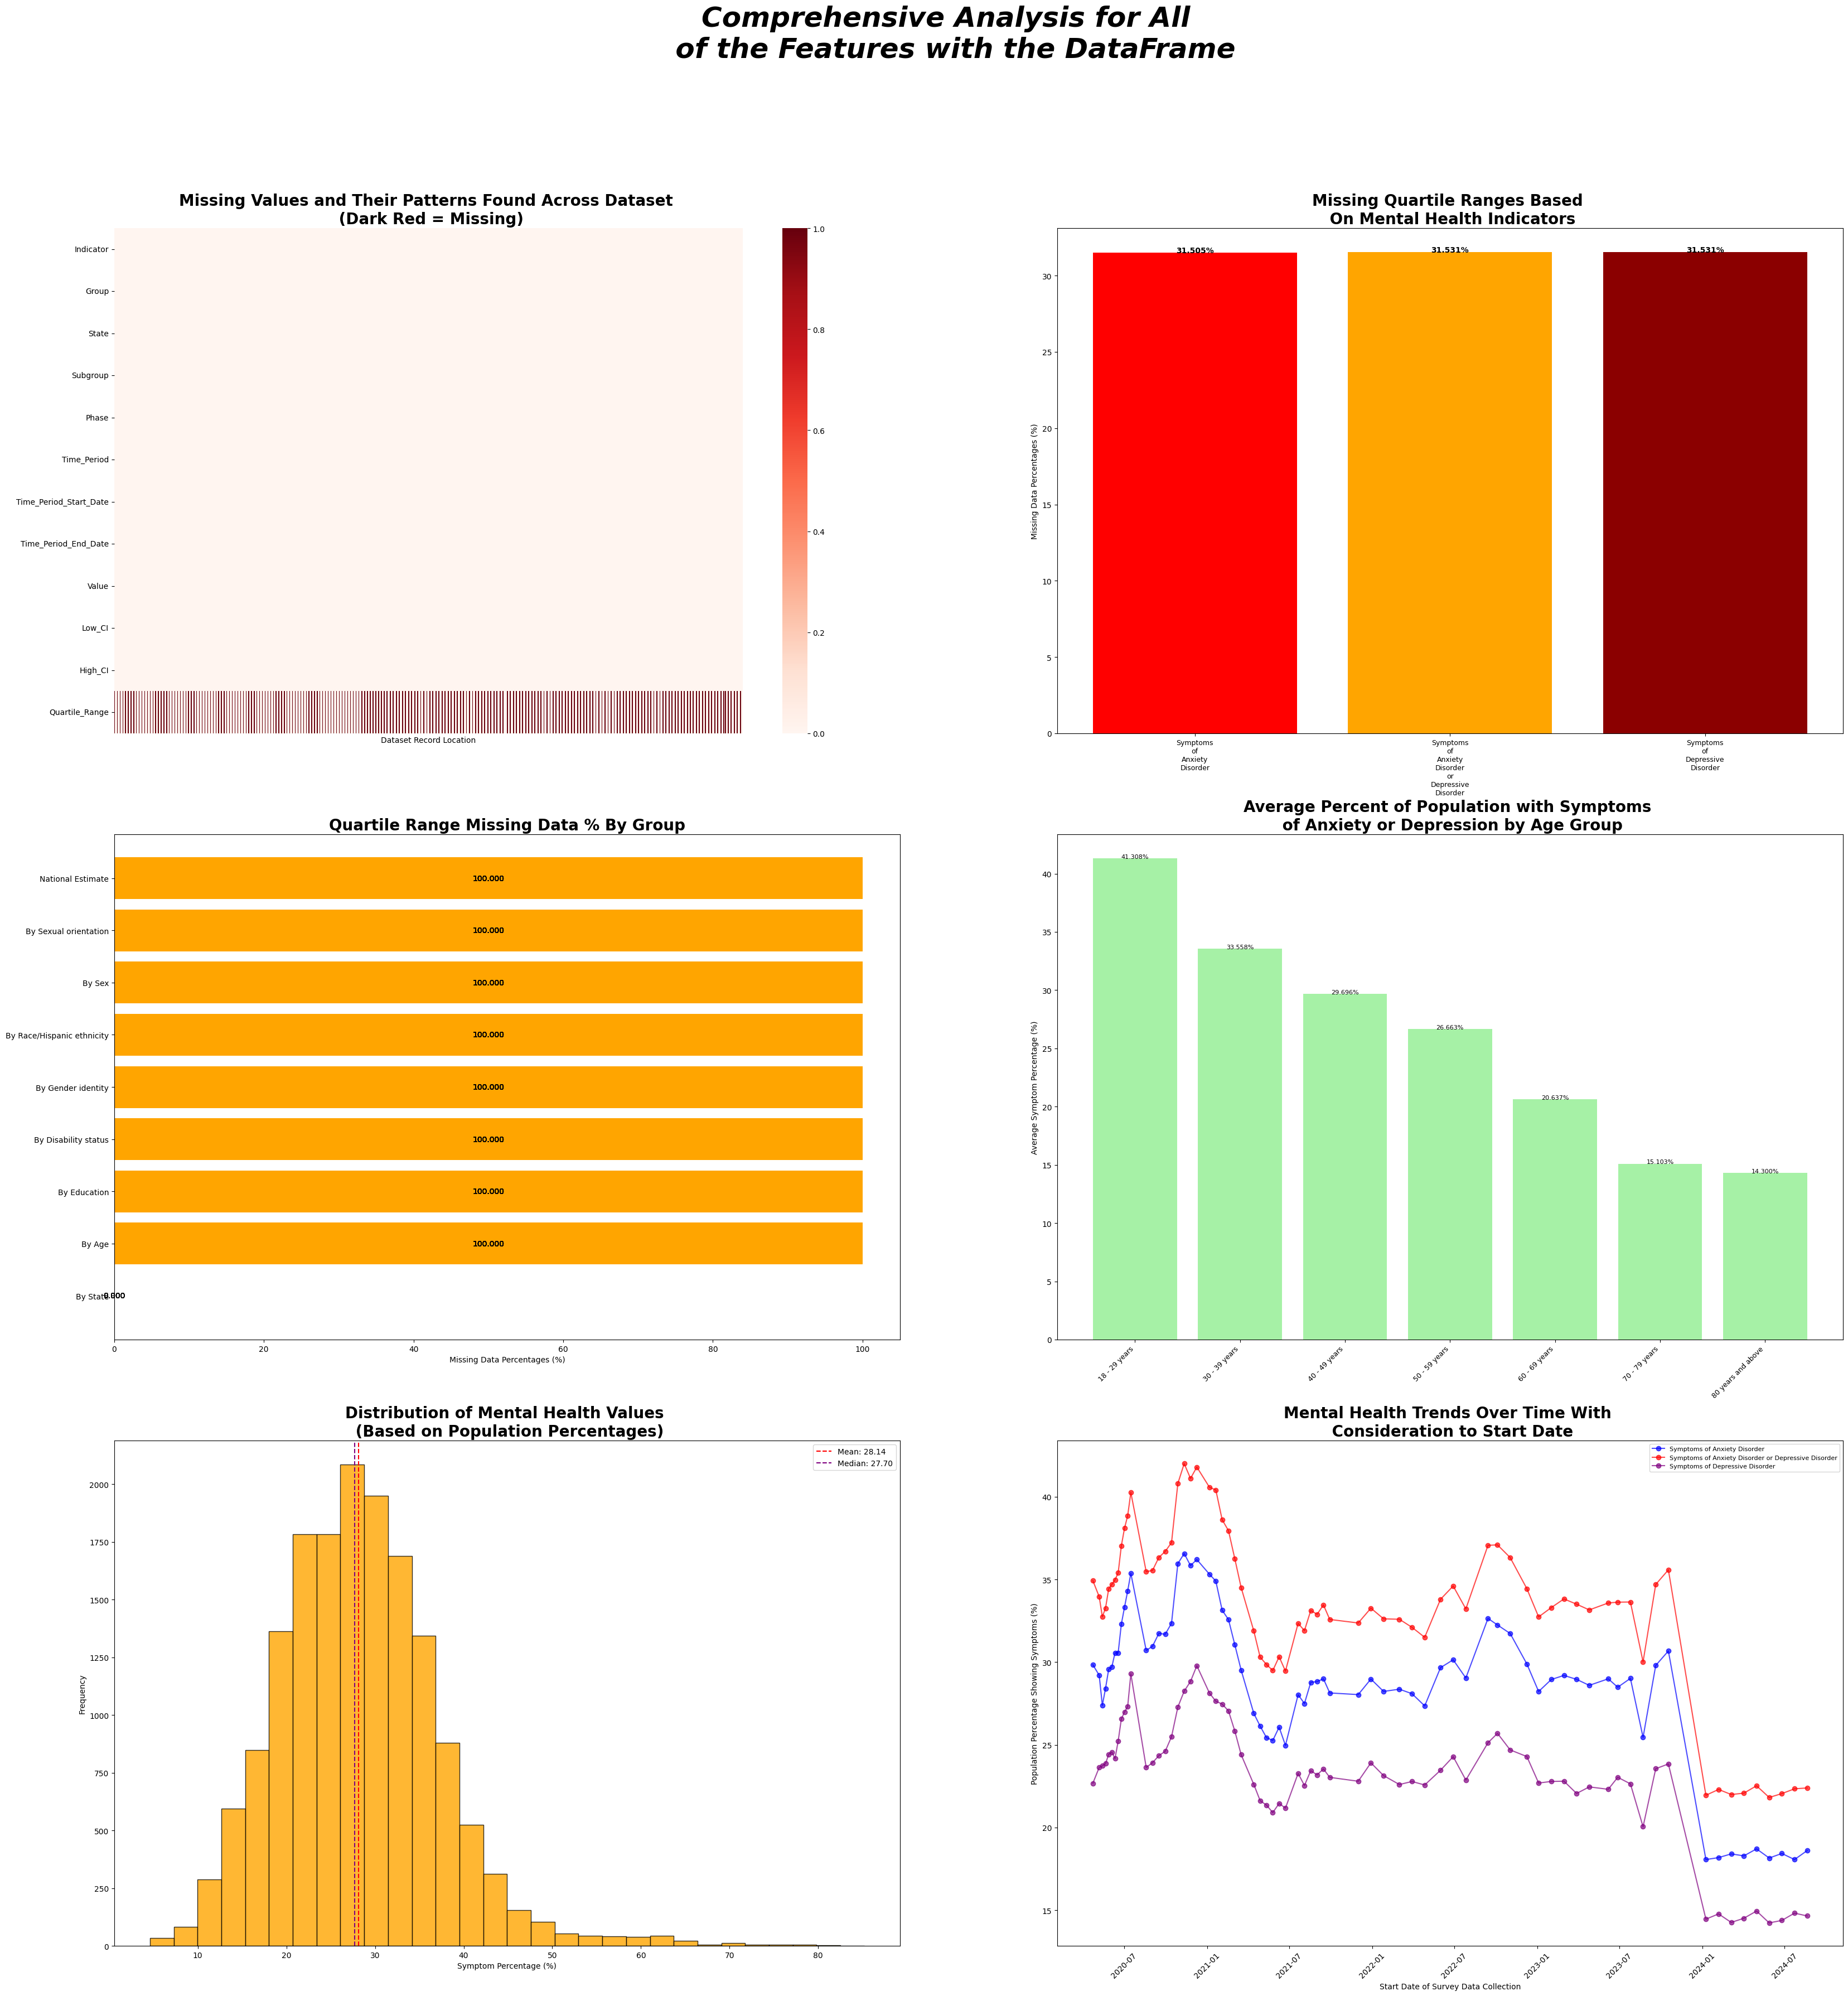

In [8]:
figure = data.analyzing_target_variable_patterns(reformat_pop_df, target_variable='Value')

### 'Quartile_Range' Range Assignment Protocol
With the official determination as to how the regression-task target variable values will be handled, it was important to develop a method that could develop accurate quartile ranges based on the values that were found in the regression-task target variable column "**Value**," but it was also necessary to ensure several conditions were met when the quartile ranges were developed:

1. The quartile ranges had to consider the potential aggregation of the columns "**Group**," "**Subgroup**," "**Phase**," and "**Time_Period**" when developing the ranges.
2. The quartile ranges had to be valid and contain the actual entry located in the target-variable column "**Value**."
3. The quartile ranges must not be affected by the outliers that were creating the right-handed skewness within the distribution of the values of the "**Value**" column.


Prior to the creation and development of the quartile ranges, it was essential to understand the location of outliers within the data and the number of outliers present. Using the method *statistics.outlier_detection_on_target(df, target_variable, drop_col)* (this is a statistical calculation function, so the column "**Phase_Date_Specification**" must be dropped), the function used three different methods to generate a list of indices from the DataFrame structure **reformat_pop_df** to identify locations where outliers were found and returned a dictionary where the keys were string that contained the name of the method used. At the same time, the value of the item was the list of indices of the locations where the program found outliers within the dataset. 

The program employed three methods: the Interquartile (IQR) method, the Z-score method, and the Percentile method. Through analysis of the results, the percentile method identified the highest number of outliers within the dataset, which comprised 314 outliers (1.952%). The IQR method identified 278 outliers (1.728%), while the Z-score method reported the lowest number of outliers, at 192 (1.194%). However, all the methods were in agreement, and they showed a common trend: the outliers typically had values larger than the mean and median, and they were above what was considered the regular distribution for each method. Within the function, another method was implemented to showcase the distribution of the outliers within the unique groupings of each column. When evaluating the distribution of outliers, an imbalance of outliers was found within each of the groupings for each column, making the reasoning for a logarithmic transformation more imperative. 


Overview of Statistical Analysis for Column 'Value':

Mean of Column Currently: 28.141
Standard Deviation of Column Currently: 8.952
Median of Column Currently: 27.700
Minimum Value found in Column Currently: 4.6
Maximum Value found in Column Currently: 85.2
Pearson's Second Coefficient (Testing for Skewness): 0.148
Interpretation of Skewness Currently: Approximately Symmetric


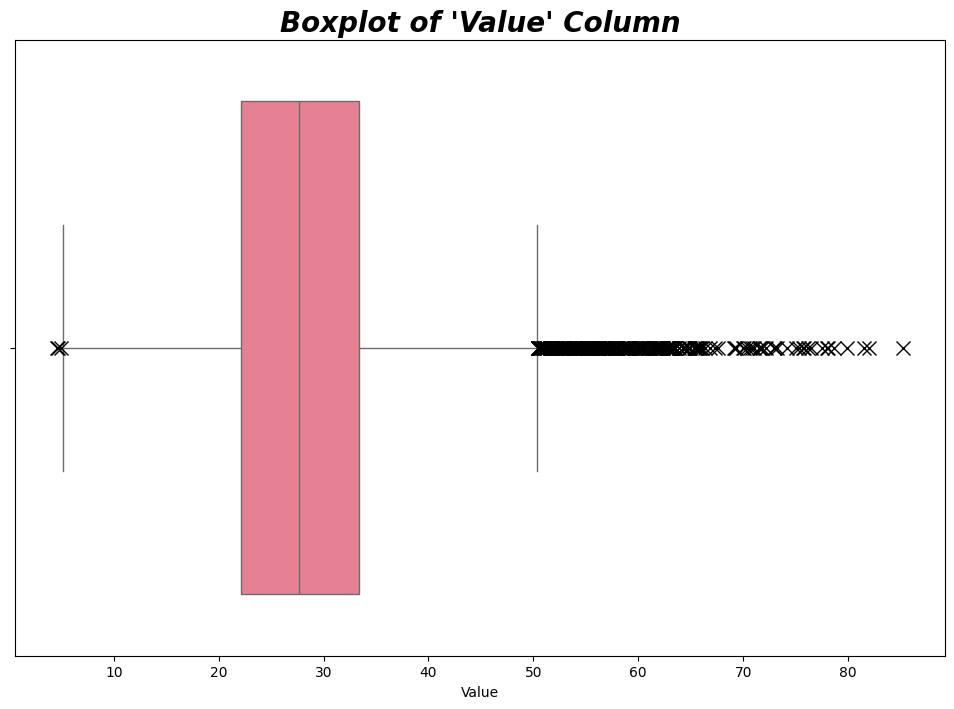


Method 1 - IQR Calculations:
Lower Quantile: 22.100
Upper Quantile: 33.400
IQR Found: 11.300
Lower bound limit for values in 'Value' column: 5.150
Upper bound limit for values in 'Value' column: 50.350
Number of Outliers found in 'Value' Column: 278 (1.728 %)

Method 2 - Z Score Calculations:
Z Score Method Threshold = 3
Number of Outliers found: 192 (1.194 %)

Method 3 - Percentile Method:
Outliers will be located below 1st percentile and above 99th percentile.
1st Percentile for 'Value' Column: 10.600
99th Percentile for 'Value' Column: 56.500
Number of Outliers Found 314 (1.952 %)
Range for outliers from IQR Data for 'Value' Column: 4.6 (min) to 85.2 (max)

Evaluating Outliers Based on Group Type:

 By Indicator:
'Symptoms of Anxiety Disorder or Depressive Disorder': 134 Outliers
'Symptoms of Anxiety Disorder': 99 Outliers
'Symptoms of Depressive Disorder': 45 Outliers

 By Group:
'By Gender identity': 98 Outliers
'By Disability status': 88 Outliers
'By Sexual orientation': 62 Outl

In [9]:
outliers_dict = statistics.outlier_detection_on_target(reformat_pop_df, target_variable='Value')

In [10]:
analysis = statistics._analyze_quartile_range_pattern(reformat_pop_df)

Reviewing Groups Missing Data for Column 'Quartile_Range':
Number of Unique Groups in Dataset: 9
National Estimate                  :  216/ 216 (100.00%)
By Age                             : 1512/1512 (100.00%)
By Sex                             :  432/ 432 (100.00%)
By Race/Hispanic ethnicity         : 1080/1080 (100.00%)
By Education                       :  864/ 864 (100.00%)
By Disability status               :  270/ 270 (100.00%)
By Gender identity                 :  346/ 346 (100.00%)
By Sexual orientation              :  351/ 351 (100.00%)
Number of Unique Groups with Missing 'Quartile_Range' Data: 8

Number of Rows with Data for Column 'Quartile_Range': 11016
Groups DataFrame with data for 'Quartile_Range' (with associated percentages): 
By State

Statistics for Information with Data in 'Quartile_Range' in Correlation to other Columns: 
Target Variable ('Value') mean: 27.517
Target Variable ('Value') standard deviation: 7.196
Target Variable ('Value') median: 27.500
'Low_CI' Ex

Upon understanding the distribution and characteristics of the outliers, it became apparent that direct imputations would not be possible for the column "**Quartile_Range**." Instead, the null values would need to be assigned a quartile range generated from the readily available data in the DataFrame. In a fashion similar to how the IQR method uses the collection of values from data to find quartile 1 (Q1) to quartile 3 (Q3), the quartile range assignment method would need to use the readily accessible data to obtain the appropriate quartiles that accommodates the values within the groups. However, the method would also need to optimize the grouping to ensure that there are at least four values within the group that the method tries to make. Therefore, the method includes an optimization component where it will hierarchically try various grouping methods to find the optimal grouping strategy (a combination of greedy algorithm and linear programming) where it will attempt to find the optimal grouping strategy that will maximize the number of data values within one single group. The hierarchy of grouping is as follows:

 * Level 1: ["**Group**", "**Subgroup", "**Phase**", "**Time_Period**"] (the original grouping of columns implemented into the method)
 * Level 2: ["**Group**", "Subgroup", "Phase"] (Will exclude "**Time_Period**")
 * Level 3: ["**"Group**", "**Subgroup**"] (Will exclude "**Phase**" and "**Time_Period**")
 * Level 4: ["**Subgroup**"] (Allows to deal with cases where the categories may appear in different groups and can get more statistical power from combining data from multiple groups.)
 * Level 5: ["**Group**"] (This is the base grouping, the largest and broadest grouping that can occur.)

Through this hierarchy, the method determines the best strategy for grouping data to find the quartile ranges. Then, it returns the quartile ranges for that grouped data based on the values found in the regression-task target variable "**Value**" column. The method *statistics.apply_quartile_range_assignment(df, group_cols=['Group', 'Subgroup', 'Phase', 'Time_Period'], target_variable='Value', drop_col=['Phase_Date_Specification'], use_log=True)* was activated and generated the new quartile ranges for all of the null values in the column "**Quartile_Range**." What is important to note is the **use_log** parameter, which ensures that the method will enforce a logarithmic transformation on the values within the target column "**Value**" when going through the quartile bins. When the method completed the task, it returned a new DataFrame initialized as the object **cleaned_pop_df**. 

In [11]:
cleaned_pop_df = statistics.apply_quartile_range_assigment(reformat_pop_df, group_cols=['Group', 'Subgroup', 'Phase', 'Time_Period'], target_variable='Value', drop_col=['Phase_Date_Specification'], use_log=True)
cleaned_pop_df.head(5)

,Indicator,Group,State,Subgroup,Phase,Time_Period,Time_Period_Start_Date,Time_Period_End_Date,Value,Low_CI,High_CI,Quartile_Range,Phase_Date_Specification
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,04/23/2020,05/05/2020,23.5,22.7,24.3,23.5 - 27.4,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,04/23/2020,05/05/2020,32.7,30.2,35.2,32.7 - 36.9,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,04/23/2020,05/05/2020,25.7,24.1,27.3,25.7 - 31.4,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,04/23/2020,05/05/2020,24.8,23.3,26.2,24.2 - 27.7,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,04/23/2020,05/05/2020,23.2,21.5,25.0,23.2 - 27.9,NaN


The null rates were calculated to ensure that no outstanding rates remained, and none were found by the program at this time.

In [12]:
updated_nulls = statistics.revealing_possible_null_rates(cleaned_pop_df)

There are no null values in the DataFrame at this time.


In [13]:
cleaned_pop_df.to_csv("cleaned_pop_df.csv", index=False, header=True)

## EDA Analysis and Data Cleaning Summary
In the first part of this notebook, the predominant steps taken were to review and clean the data, identify missing values, assign new ranges, and clean the target data. However, an analysis is needed to determine how we will prepare our data before inserting it into the ML models. In this case, when examining the variables that are already available, collinearity already exists and will naturally persist in the data, both artificially and naturally, due to the calculations and the way the data was aggregated. As the researchers collected responses from the survey, they encountered a significant nonresponse rate, which unfortunately led to nonresponse bias regarding who responded and the answers they provided to the mental health questions. Furthermore, due to the life stages that individuals are going through, they may be encountering the symptoms of either anxiety disorder, depressive disorder, or both more frequently or with different symptoms. For example, a woman who is pregnant and lost a child may have a post-partum depressive disorder. However, they may respond to it differently than the questions in the survey questionnaire asked, so the woman was not included in the population. 

When generating the features for the ML model to read, it will be imperative that the following types of features be included so that the interactions will exist due to the collinearity that can occur naturally between the variables we are considering:

 - "Sex at Birth" and "Age" - studies have shown that depending upon the biological sex at birth and the age of the individual as well, it can induce specific stressors in their life, which can lead to anxiety disorder as well as depressive disorder. This interaction term we can generate will account for the natural collinearity that occurs in real life.
 - "Gender Identity" and "Age"  - depending on the individual's age and the identity of their gender (i.e., transgender, cisgender male, cisgender female), the participant may have gone through different experiences which may have caused them to experience more stressors and triggers that provoked the symptoms of anxiety disorder, depressive order, or both.
 - "Education Level" and "Age" - when an individual goes through higher education, they may encounter more symptoms correlated to anxiety or depression. Medical students can be particularly vulnerable to burnout. Furthermore, as we are studying the percentage of the population who were experiencing symptoms of either anxiety disorder, depressive disorder, or possibly both after the initial lockdown due to the COVID-19 pandemic, the percentages could have arisen from the individuals working in the job employment sector of healthcare, who were isolated in hospitals and unable to see their family members as they were taking care of patients for days at a time, even weeks.
 - "Geographic Region" and "Survey Quarter Period" - These two features would need to be derived, but this would be an interaction to consider when it comes to the area where the participant is located and when the survey response was collected. The geographic region can influence the responses that individuals provide due to the societal beliefs to which participants are exposed, as well as the type of healthcare they may receive to alleviate the symptoms they are experiencing at the time. Furthermore, when the survey responses were acquired, different geographic regions were experiencing different actions, which may have impacted the person's life differently than that of another individual living in a different state. 
 - "Age" and "Sexual Orientation": This is a significant interaction term that should also be considered. Within the last 10 years, anxiety and depressive disorder symptoms have been experienced by individuals who are within the LGBTQ+ community, especially after the COVID-19 pandemic. This consideration must also be acknowledged within the features, so it should be derived as an additional feature for the ML models.

With these factors taken into consideration, we can now proceed with the feature engineering and data pipelining process.

## The project continues in through [the link here.](./anxiety_depression_population_percentages_part2.ipynb)

## References

CDCTobaccoFree. (2023, March 14). Depression and Anxiety. Centers for Disease Control and Prevention. [https://www.cdc.gov/tobacco/campaign/tips/diseases/depression-anxiety.html](https://www.cdc.gov/tobacco/campaign/tips/diseases/depression-anxiety.html)
  
Centers for Disease Control and Prevention. (2025). Indicators of Anxiety or Depression Based on Reported Frequency of Symptoms During Last 7 Days (No. 850c51718b8205ba3bdfc5124b2adb2d7a43d1122ea92c099abc73259dbe9c40) [CSV]. Data.gov. https://catalog.data.gov/dataset/indicators-of-anxiety-or-depression-based-on-reported-frequency-of-symptoms-during-last-7-

Diamond, F. (2021, February 1). Goodbye to January 2021, COVID-19’s Worst Month (So Far). Infection Control Today. https://www.infectioncontroltoday.com/view/goodbye-to-january-2021-covid-19-s-worst-month-so-far-

Halperin, S. J., Henderson, M. N., Prenner, S., & Grauer, J. N. (2021). Prevalence of Anxiety and Depression Among Medical Students During the Covid-19 Pandemic: A Cross-Sectional Study. Journal of Medical Education and Curricular Development, 8, 2382120521991150. https://doi.org/10.1177/2382120521991150

Kalin, N. H. (2020). The Critical Relationship Between Anxiety and Depression. American Journal of Psychiatry, 177(5), 365–367. https://doi.org/10.1176/appi.ajp.2020.20030305

Mishra, A. K., & Varma, A. R. (2023). A Comprehensive Review of the Generalized Anxiety Disorder. Cureus. https://doi.org/10.7759/cureus.46115

National Center for Health Statistics, & U.S. Census Bureau. (2025, February 7). Mental Health - Household Pulse Survey - COVID-19. https://www.cdc.gov/nchs/covid19/pulse/mental-health.htm

Penninx, B. W., Pine, D. S., Holmes, E. A., & Reif, A. (2021). Anxiety disorders. The Lancet, 397(10277), 914–927. https://doi.org/10.1016/S0140-6736(21)00359-7

U.S. Census Bureau. (2020). Source of the Data and Accuracy of the Estimates for the 2020 Household Pulse Survey - Phase 2. U.S. Census Bureau. https://www2.census.gov/programs-surveys/demo/technical-documentation/hhp/Phase2_Source_and_Accuracy-Week%2013.pdf

US Census Bureau. (2025a, April 15). Household Pulse Survey Data Tables. Census.Gov. https://www.census.gov/programs-surveys/household-pulse-survey/data/tables.html

US Census Bureau. (2025b, April 30). Household Pulse Survey: Measuring Emergent Social and Economic Matters Facing U.S. Households. Census.Gov. https://www.census.gov/data/experimental-data-products/household-pulse-survey.html